In [ ]:
!pip install --quiet transformers==4.5.0
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 13.0 MB/s eta 0:00:00

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning #importing base model from git hub
import pytorch_lightning as pl
print(pl.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-q3sd4rxn
  Running command git clone --filter=blob:none --quiet https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-q3sd4rxn
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit d7b668eb94b3d224e0e6d1fb396b1f3159d6bcc3
  Running command git submodule update --init --recursive -q
  Encountered 31 file(s) that should have been pointers, but weren't:
        .notebooks/course_UvA-DL/01-introduction-to-pytorch.ipynb
        .notebooks/course_UvA-DL/02-activation-functions.ipynb
        .notebooks/course_UvA-DL/03-initialization-and-optimization.ipynb
        .notebooks/course_UvA-DL/04-inception-resnet-densenet.ipynb
        .notebooks/course_UvA-DL/05-transformers-and-MH-attention.ipynb
        .notebooks/course_UvA-DL/06-graph-neural-networks.ipynb
        .notebo

In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.5 MB/s eta 0:00:

In [ ]:
import json
import pandas as pd
import numpy as np
import transformers
from pathlib import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap
from datasets import load_dataset, load_metric
import datasets
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)

from tqdm.auto import tqdm

#visulaizing libraries
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
rcParams['figure.figsize']=16,10
pl.seed_everything(42)

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
news_data = load_dataset("multi_news")

Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Dataset multi_news downloaded and prepared to /root/.cache/huggingface/datasets/multi_news/default/1.0.0/2f1f69a2bedc8ad1c5d8ae5148e4755ee7095f465c1c01ae8f85454342065a72. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
del news_data['validation']

In [ ]:
news_data['train'] = news_data['train'].select(range(10000))
news_data['test'] = news_data['test'].select(range(1000))

In [ ]:
print("Train Set Size: ",len(news_data['train']))
print("Test Set Size: ", len(news_data['test']))

Train Set Size:  10000
Test Set Size:  1000


In [ ]:
train_df=pd.DataFrame(news_data['train'].to_dict())
test_df=pd.DataFrame(news_data['test'].to_dict())

In [ ]:
train_df.head()

,document,summary
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc..."
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...
3,Tucker Carlson Exposes His Own Sexism on Twitt...,– Tucker Carlson is in deep doodoo with conser...
4,A man accused of removing another man's testic...,– What are the three most horrifying words in ...


In [ ]:
model_name="t5-base"     #importing t5base model
tokenizer=T5Tokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
text_token_counts, summary_token_counts= [],[]

for _, row in train_df.iterrows():
  text_token_count=len(tokenizer.encode(row["document"]))
  text_token_counts.append(text_token_count)

  summary_token_count=len(tokenizer.encode(row["summary"]))
  summary_token_counts.append(summary_token_count)

Token indices sequence length is longer than the specified maximum sequence length for this model (1211 > 512). Running this sequence through the model will result in indexing errors


Text(0.5, 1.0, 'Full summary token counts')

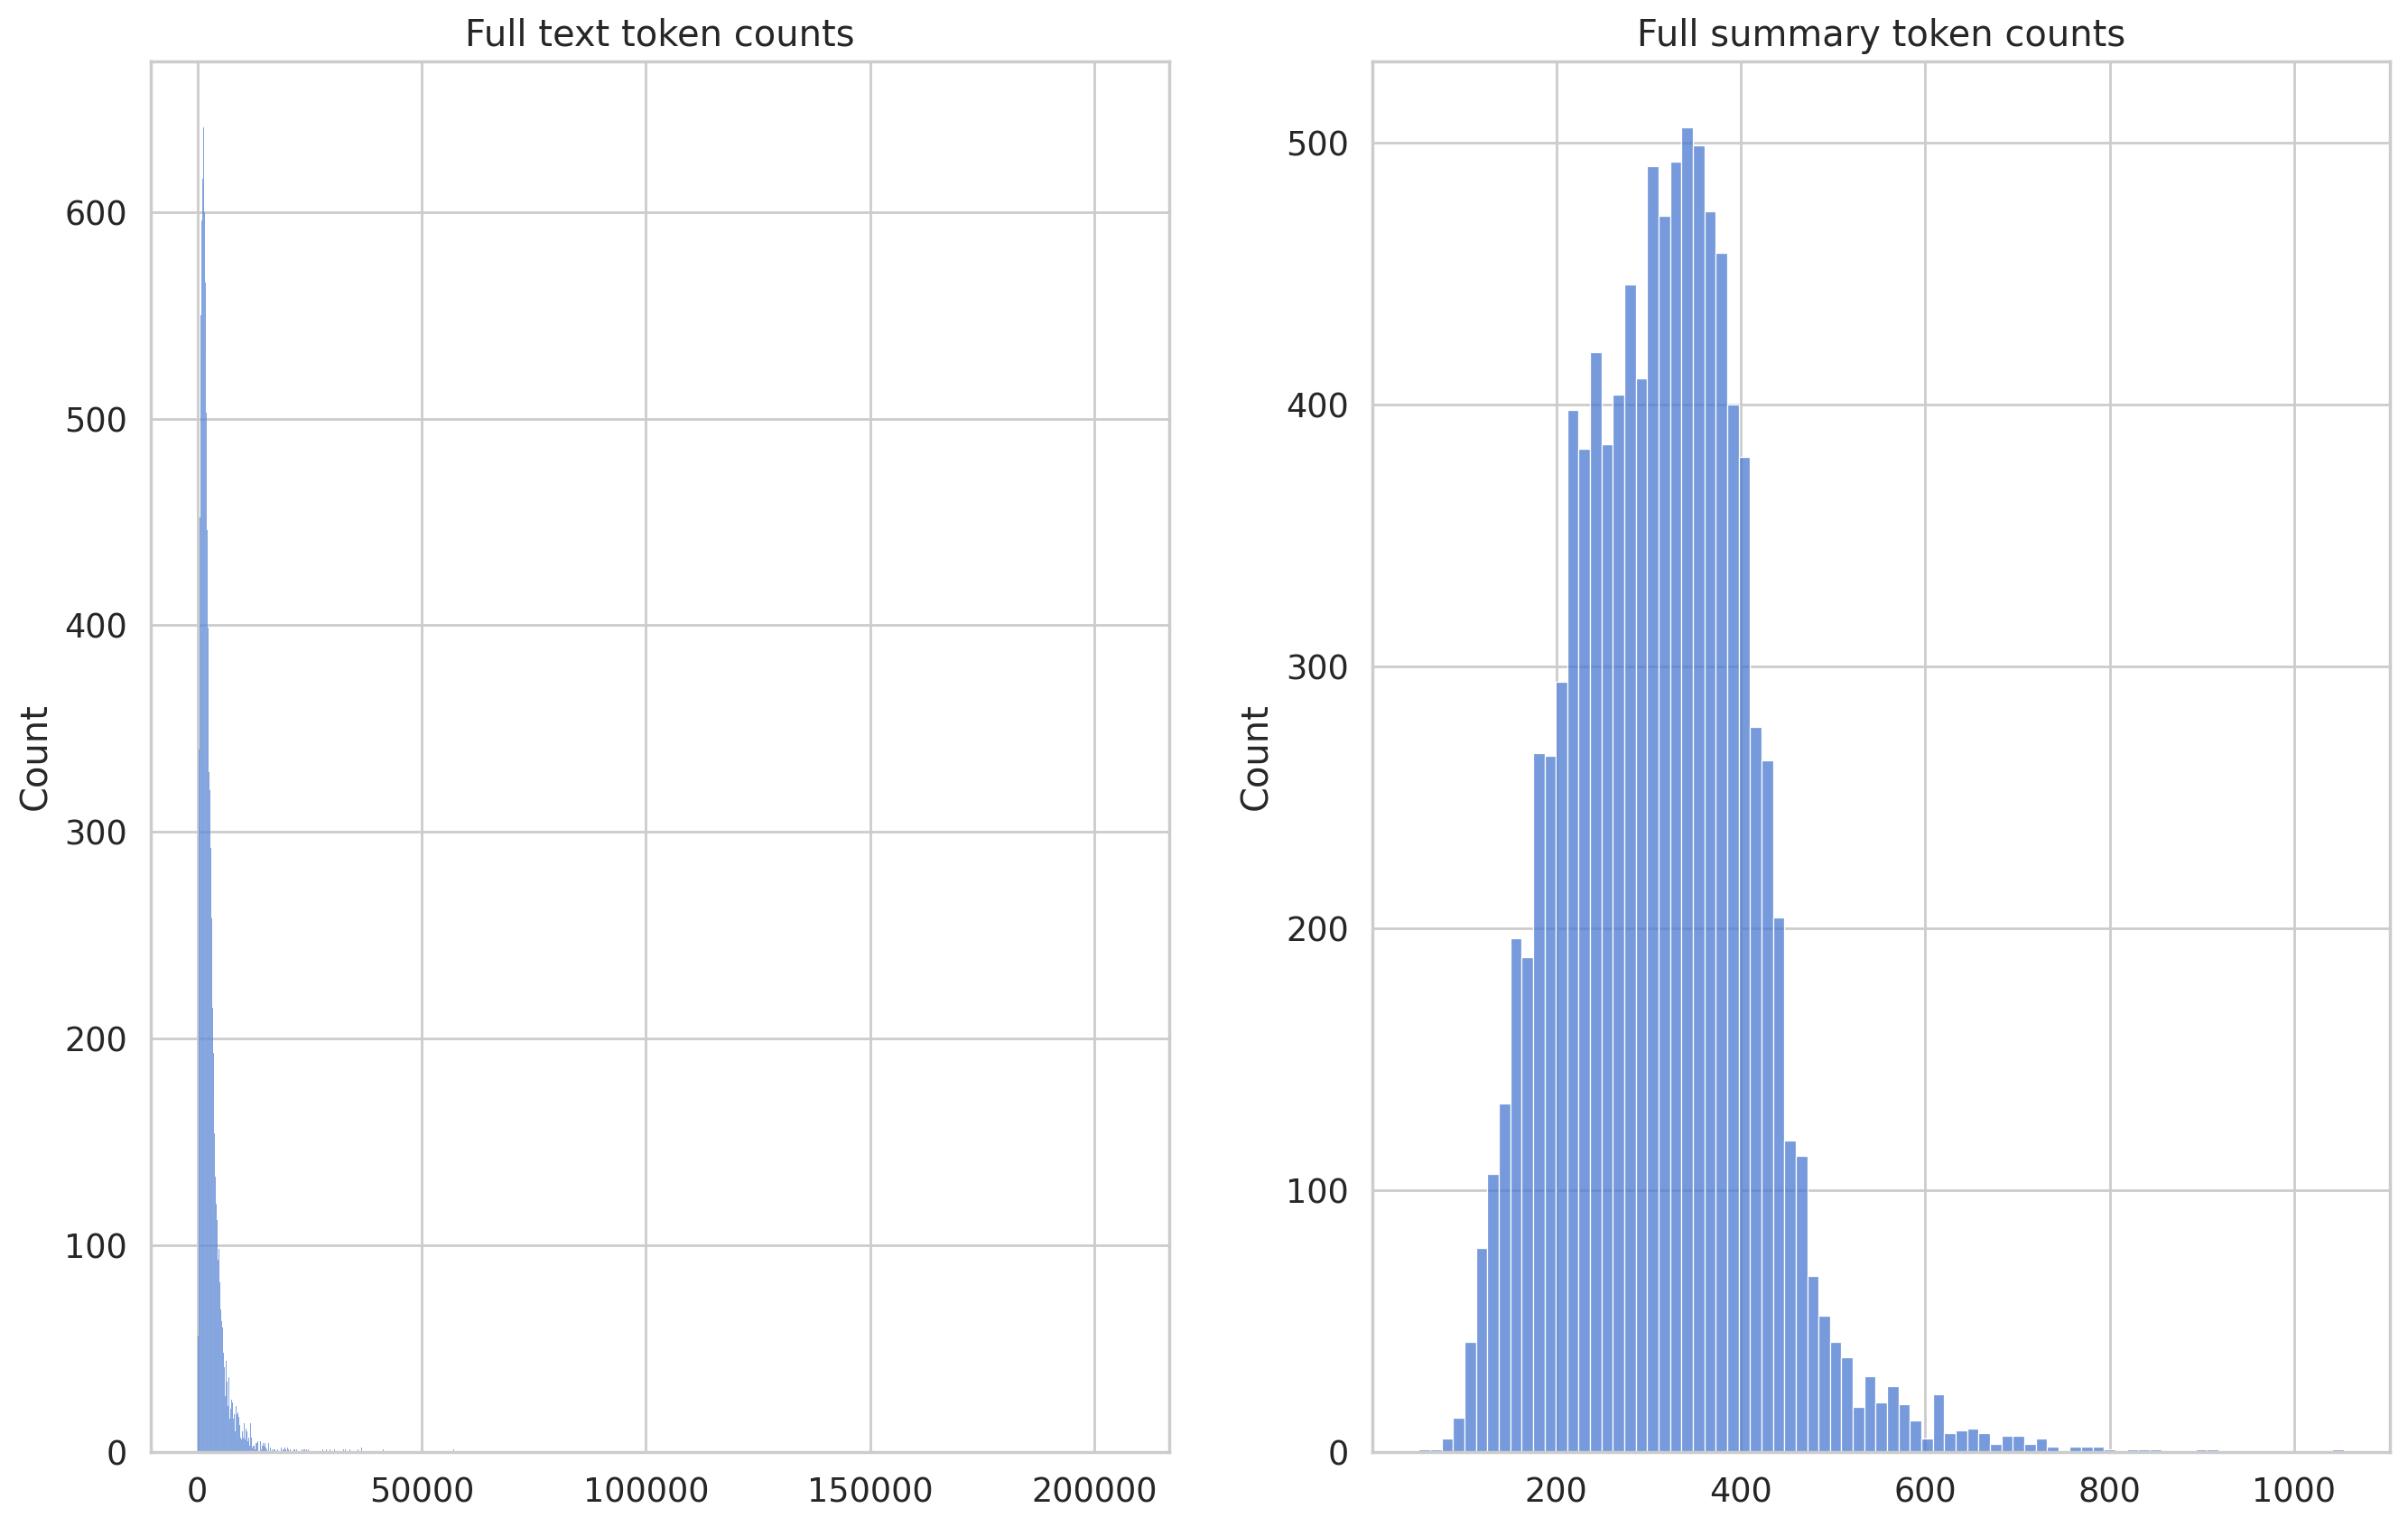

In [ ]:
#visualising Text and summary token counts
fig, (ax1,ax2)=plt.subplots(1,2)
sns.histplot(text_token_counts,ax=ax1)
ax1.set_title("Full text token counts")
sns.histplot(summary_token_counts,ax=ax2)
ax2.set_title("Full summary token counts")

In [ ]:
import gc
gc.collect()

203

In [ ]:
class NewsSummaryDataset(Dataset):

  def __init__(
      self,
      data: pd.DataFrame,
      tokenizer: T5Tokenizer,
      batch_size: int =8,
      text_max_token_len: int =128,
      summary_max_token_len: int =128
  ):
      self.tokenizer=tokenizer
      self.data=data
      self.batch_size=batch_size
      self.text_max_token_len=text_max_token_len
      self.summary_max_token_len= summary_max_token_len


  def __len__(self):
    return len(self.data)

  def __getitem__(self, index:int):
    data_row=self.data.iloc[index]
    text=data_row["document"]


    text_encoding=tokenizer( #text encoding
        text,
        max_length=self.text_max_token_len,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"

    )

    summary_encoding=tokenizer( #summary encoding
        data_row["summary"],
        max_length=self.summary_max_token_len,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"

    )


    labels= summary_encoding["input_ids"]                 #token are converted into int so those ar the input ids
    labels[labels==0]= -100                              ##??? uknwokn i.e empty space is assigned as -100

    return dict(
        text=text,
        summary=data_row["summary"],
        text_input_ids=text_encoding["input_ids"].flatten(),
        text_attention_mask=text_encoding["attention_mask"].flatten(),
        labels=labels.flatten(),
        labels_attention_mask=summary_encoding["attention_mask"].flatten()

    )


In [ ]:
class NewsSummaryDataModule(pl.LightningDataModule):
  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: T5Tokenizer,
      batch_size: int= 10,
      text_max_token_len: int =1024,
      summary_max_token_len: int =128

  ):
      super().__init__()
      self.train_df=train_df
      self.test_df=test_df
      self.batch_size=batch_size
      self.tokenizer=tokenizer
      self.text_max_token_len=text_max_token_len
      self.summary_max_token_len=summary_max_token_len

  def setup(self, stage=None):
    self.train_dataset=NewsSummaryDataset(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len

    )
    self.test_dataset=NewsSummaryDataset(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len

    )

  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=False,
        num_workers=2

    )

  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=False,
        num_workers=2

    )

  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=False,
        num_workers=2

    )

In [ ]:
epochs=5
batch_size=10
data_module=NewsSummaryDataModule(train_df,test_df, tokenizer, batch_size=batch_size)

In [ ]:
class NewsSummaryModel(pl.LightningModule):

  def __init__(self):
    super().__init__()
    self.model = T5ForConditionalGeneration.from_pretrained(model_name, return_dict=True)

  def forward(self,input_ids,attention_mask,decoder_attention_mask,labels=None):
    output= self.model(
        input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=decoder_attention_mask
    )

    return output.loss, output.logits

  def training_step(self,batch,batch_idx):
    input_ids=batch["text_input_ids"]
    attention_mask=batch["text_attention_mask"]
    labels=batch["labels"]
    labels_attention_mask=batch["labels_attention_mask"]

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("train_loss",loss, prog_bar=True,logger=True)                  #progbar?
    return loss


  def validation_step(self,batch,batch_idx):
    input_ids=batch["text_input_ids"]
    attention_mask=batch["text_attention_mask"]
    labels=batch["labels"]
    labels_attention_mask=batch["labels_attention_mask"]

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("val_loss",loss, prog_bar=True,logger=True)
    return loss

  def test_step(self,batch,batch_idx):
    input_ids=batch["input_ids"]
    attention_mask=batch["attention_mask"]
    labels=batch["labels"]
    labels_attention_mask=batch["labels_attention_mask"]

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("test_loss",loss, prog_bar=True,logger=True)
    return loss

  def configure_optimizers(self):
    return AdamW(self.parameters(), lr=0.0001)



In [ ]:
import torch
if torch.cuda.is_available():  # Tell PyTorch to use the GPU.
 device = torch.device("cuda")
 print('There are %d GPU(s) available.' % torch.cuda.device_count())
 print('We will use the GPU:', torch.cuda.get_device_name(0)) # If not...
else:
 print('No GPU available, using the CPU instead.')
 device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
model=NewsSummaryModel()
model.to(device)

NewsSummaryModel(
  (model): T5ForConditionalGeneration(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear(in_fe

In [ ]:
#creating checkpint function
checkpoint_callback= ModelCheckpoint(
    dirpath="..checkpoint directory path..",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode="min"
)

logger= TensorBoardLogger("lightning_logs",name="news-summary")


In [ ]:
trainer=pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=epochs
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# trainer.fit(model,data_module)

In [ ]:
trained_model=NewsSummaryModel.load_from_checkpoint("..best checkpoint path..")
trained_model.to("cpu")
trained_model.freeze()

In [ ]:
gc.collect()

79

In [ ]:
def summarize(text,model_name):
  text_encoding=tokenizer(
      text,
      max_length=1024,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors="pt"
  )

  generated_ids=model_name.model.generate(
      input_ids=text_encoding["input_ids"],
      attention_mask=text_encoding["attention_mask"],
      max_length=150,
      num_beams=2,
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
  )


  preds = [
      tokenizer.decode(gen_id,skip_special_tokens=True, clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
  ]

  return  "".join(preds)

In [ ]:
sample_row=test_df.iloc[1]
document=sample_row["document"]
model_summary=summarize(document,trained_model)

In [ ]:
sample_row["document"]

'\n \n \n \n UPDATE: 4/19/2001 Read Richard Metzger: How I, a married, middle-aged man, became an accidental spokesperson for gay rights overnight on Boing Boing \n \n It’s time to clarify a few details about the controversial “Hey Facebook what’s SO wrong with a pic of two men kissing?” story, as it now beginning to be reported in the mainstream media, and not always correctly. \n \n First of all, with regards to the picture: \n \n The photo which was used to illustrate my first post about the John Snow Kiss-In is a promotional still from the British soap opera “Eastenders.” It features one of the main characters from the show (Christian Clarke, played by the actor John Partridge- left) and someone else who I don’t know. I am not a regular viewer so I can’t say if the man on the right is an extra or an actual character. \n \n This picture has itself caused scandal in the UK, as it was a gay kiss that was broadcast before the watershed, and as such led to a number of complaints to the 

In [ ]:
model_summary

'– A photo of two gay men kissing in London has been removed from the Dangerous Minds Facebook page, and it\'s not just because it was posted to the site. It\'s also because the event organizer, Paul Shetler, says he didn\'t want to be associated with the photos, but because he thought they were "too racy." The Guardian reports that after she posted the photo on her Facebook page last week, Shetler said he had no idea what was going on: "I think we haven\'t seen them," he writes. "We don\'t'

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
reference_summary = sample_row["summary"]
generated_summary= model_summary
# Calculate ROUGE scores
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_summary, reference_summary)
print(rouge_scores)

[{'rouge-1': {'r': 0.3017241379310345, 'p': 0.44871794871794873, 'f': 0.36082473745987886}, 'rouge-2': {'r': 0.059880239520958084, 'p': 0.10989010989010989, 'f': 0.07751937527882967}, 'rouge-l': {'r': 0.23275862068965517, 'p': 0.34615384615384615, 'f': 0.2783505106557552}}]


In [ ]:
# Prepare data for the DataFrame
data = {
    "Metric": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

# Extract ROUGE scores and add them to the data dictionary
for metric, scores in rouge_scores[0].items():
    data["Metric"].append(metric)
    data["Precision"].append(scores[  "p"])
    data["Recall"].append(scores["r"])
    data["F1"].append(scores["f"])

# Create the DataFrame
df = pd.DataFrame(data)

# Format the DataFrame for a more presentable output
df_formatted = df.set_index("Metric").round(4)

# Print the formatted DataFrame
print("ROUGE Scores:")
print(df_formatted)

ROUGE Scores:
         Precision  Recall      F1
Metric                            
rouge-1     0.4487  0.3017  0.3608
rouge-2     0.1099  0.0599  0.0775
rouge-l     0.3462  0.2328  0.2784


In [ ]:

!pip install -q -U newspaper3k


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 80.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from fastapi import FastAPI
import pickle
import newspaper
from newspaper import Config
from newspaper import Article
!pip install nltk
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download("stopwords")
nltk.download("punkt")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
url = "https://www.cnn.com/2020/05/29/tech/facebook-violence-trump/index.html"
article = Article(url)
article.download()
article.parse()
print(article.text)

CNN —

Over and over again in 2018, during an apology tour that took him from the halls of the US Congress to an appearance before the European Parliament, Mark Zuckerberg said Facebook had failed to “take a broad enough view of our responsibilities.”

But two years later, Zuckerberg and Facebook are still struggling with their responsibilities and how to handle one of their most famous users: President Donald Trump.

Despite Zuckerberg having previously indicated any post that “incites violence” would be a line in the sand — even if it came from a politician — Facebook remained silent for hours Friday after Trump was accused of glorifying violence in posts that appeared on its platforms.

At 12:53am ET on Friday morning, as cable news networks carried images of fires and destructive protests in Minneapolis, the President tweeted: “These THUGS are dishonoring the memory of George Floyd, and I won’t let that happen. Just spoke to Governor Tim Walz and told him that the Military is with 

In [ ]:
summarize(article.text,trained_model)

'– Facebook isn\'t the only social media company that has been accused of "inflicting violence" on its users, but it does have a warning label. In a tweet posted to Twitter Friday, President Trump said: "When the looting starts, the shooting starts." The message was also posted to his Instagram account, which is owned by Facebook, and had more than 300,000 likes. It\'s not clear whether the president will be allowed to use the word "violence" in any other way, reports Politico. But Zuckerberg didn\'t say whether he would'

**Serving Model**

In [ ]:
!pip install colabcode
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 

In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI

In [ ]:
cc = ColabCode(port=12000, code=False)

In [ ]:
# app = FastAPI()

# @app.get("/")
# async def read_root():
#   return {"message": "Summarizer"}

In [ ]:
  # cc.run_app(app=app)

In [ ]:
import pickle
pickle.dump(trained_model, open("model_t5.pkl", "wb"))

In [ ]:
from pydantic import BaseModel
class TextRequest(BaseModel):
    url: str

In [ ]:
import pickle
import logging
from fastapi import FastAPI

app = FastAPI(title="ML Models as API on Google Colab", description="with FastAPI and ColabCode", version="1.0")

model = None

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_t5.pkl", "rb"))

@app.post("/predict")
async def get_predictions(request: TextRequest):
    url=request.url
    article = Article(url)
    text = article.text
    predictions=summarize(article.text,model)

    return {"Summary": predictions}

In [ ]:
!ngrok config add-authtoken 2PQKOqRe8PV843TvMmuaFWdZATZ_5GZ8rsw2NfHGzoteXTD4z

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
cc.run_app(app=app)

INFO:     Started server process [2179]
INFO:uvicorn.error:Started server process [2179]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.


Public URL: NgrokTunnel: "https://11b6-35-184-183-243.ngrok-free.app" -> "http://localhost:12000"


INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


INFO:     103.115.203.188:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     103.115.203.188:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     103.115.203.188:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     103.115.203.188:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:uvicorn.error:Shutting down
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.
INFO:     Finished server process [2179]
INFO:uvicorn.error:Finished server process [2179]
